# Classification

Importing the common libraries

In [4]:
# importing the necessary lib/packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Upload and Get to know the data mathematically and Graphically

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


,Total,Percent
age,263,20.091673
boat,823,62.872422
body,1188,90.756303
cabin,1014,77.463713
embarked,2,0.152788


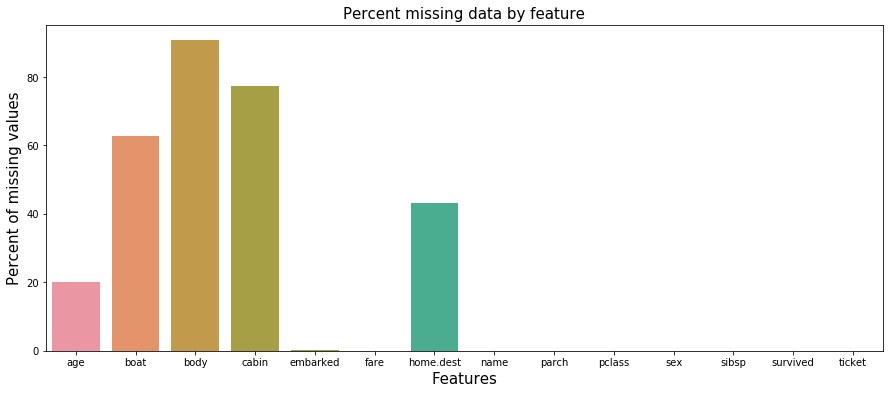

In [5]:
#upload data using pandas data frame
data = pd.read_csv('titanic3.csv')
data.info()
data.head()
data.describe()
data['embarked'].value_counts()
# missing data with aggregation and graph
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count().sort_values(ascending=False))*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()
#claculating the missing values and plotting
total = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
sns.barplot(x=percentage.values,y=percentage.index)
plt.title('Missing values with percentage')
plt.xlabel('Percentage')
plt.ylabel('Attributes')
plt.show()
sns.barplot(x=total.values,y=total.index)
plt.title('Missing values with count')
plt.xlabel('Count')
plt.ylabel('Attributes')
plt.show()
print(total)

# Data Visualization

In [7]:
#data visualization


# Data Cleaning 

In [7]:
#the attributes body and boat are dropped.
data = data.drop(['boat','body'],axis=1)#filled empty fare with median
data.fare.fillna(data.fare.median(),inplace=True)
# filled empty embarked values with most repeated one
data.embarked.fillna(data.embarked.mode()[0],inplace=True)
# I am removing the cabin and home destination as there are more data missing. I think It won't affect the model.
data = data.drop(['cabin','home.dest'],axis=1)
# I am using mean to fill the missing age data.
data.age.fillna(data.age.mean(),inplace=True)
# i am coverting sex column(male,female) to 0 or 1 
data['sex'] = pd.factorize(data.sex)[0]
# i am droping name,ticket,embarked
data = data.drop(['name','ticket','embarked'],axis=1)

Split data into X and Y, Split into test and train

In [ ]:
#seperate dataset into x and y
x = data.drop(['survived'],axis=1)
y = data['survived']
data.info()
#split data set into test and train with 70 and 30 percentage
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Handle Imbalance Dataset

Under Sampling

In [ ]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(x,y)
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Over Sampling

In [ ]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.7)
X_train_res3, y_train_res3 = os_us.fit_sample(x, y)
X_train_res3.shape,y_train_res3.shape
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res3)))

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.7)
X_train_res2, y_train_res2 = os.fit_sample(x, y)
X_train_res2.shape,y_train_res2.shape
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res2)))


from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res1,y_res1=smk.fit_sample(x,y)
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

# Random Forest Model

In [12]:
#creating the random forest model
from sklearn.ensemble import RandomForestClassifier
# model4 = RandomForestClassifier()
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
y4_predict = model4.predict(x_test)
 
# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y4_predict,y_test))
print(roc_auc_score(y4_predict,y_test))

# checking the importance of the attributes using random forest
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model4.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print('Random Forest importance feature are')
importances.head(15)

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y3_predict,y_test3))
print("Recall:",recall_score(y3_predict,y_test3))



#------Optimization
#n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
#max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
#min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
#min_samples_leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
#max_features
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

#creating the random forest model using the optimized parameters found in the above graphs
optimize_model = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
optimize_model.fit(x_train,y_train)
y_pred = optimize_model.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y3_predict,y_test3))
print("Recall:",recall_score(y3_predict,y_test3))

#further evaluation 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model4, x_train, y_train, cv=3)
#confusion matrix
confusion_matrix(y_train, predictions)
#calculation of f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

# Decision Tree Model

In [ ]:
# create a decision tree model and train the model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
y1_predict = model1.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve
print(accuracy_score(y1_predict,y_test))
print(roc_auc_score(y1_predict,y_test))
#further evaluation 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model4, x_train, y_train, cv=3)
#confusion matrix
confusion_matrix(y_train, predictions)
#calculation of f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

# Logistic Regression

In [ ]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train,y_train)
y2_predict = model2.predict(x_test)

# finding an accuracy and area under roc curve
print(accuracy_score(y2_predict,y_test))
print(roc_auc_score(y2_predict,y_test))
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y3_predict,y_test3))
print("Recall:",recall_score(y3_predict,y_test3))

# k nearest neighbor model

In [ ]:
# create k nearest neighbor model
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,26))
scores = []
curve = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y3_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y3_pred))
    curve.append(roc_auc_score(y_test, y3_pred))
    
#further evaluation 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model4, x_train, y_train, cv=3)
#confusion matrix
confusion_matrix(y_train, predictions)
#calculation of f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)
# finding an accuracy and area under roc curve for different values of k and plotting it.
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, curve)
plt.xlabel('Value of k for KNN')
plt.ylabel('Area under roc curve')
plt.title('Area under roc curve for Values of k of k-Nearest-Neighbors')
plt.show()